<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 1

This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>**1: Inital Overview of the Data**</u>
* There are 532 observations and 34 variables.
* The Dataset is comprised of floats and ints
* The following variables have 174 missing values: <i>lhrwage</i> and <i>hrwage</i>

In [2]:
#Read/load the dataset
sleep = '../sleep/sleep_bh.csv'
sleep = pd.read_csv(sleep)

In [3]:
sleep.describe()

/Users/shaniselukie/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,NaN,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,NaN,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,NaN,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


In [4]:
#Check Shape of Dataset
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [5]:
#Type of Values 
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [6]:
#Missing Values 
sleep.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [7]:
#Drop Missing Values
sleep.dropna(subset = ['lhrwage', 'hrwage'], inplace = True)
sleep.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64

In [8]:
#Check for Binary Variables 
binary_var = sleep[['black', 'clerical', 'construc', 'gdhlth', 'inlf', 'smsa', 'male', 'marr', 'prot', 'selfe', 'spwrk75', 'union', 'yngkid']]

binary_var.head()

,black,clerical,construc,gdhlth,inlf,smsa,male,marr,prot,selfe,spwrk75,union,yngkid
0,0,0.0,0.0,0,1,0,1,1,1,0,0,0,0
1,0,0.0,0.0,1,1,0,1,0,1,1,0,0,0
2,0,0.0,0.0,1,1,1,1,1,0,1,1,0,0
3,0,0.0,0.0,1,1,0,0,1,1,1,1,0,0
4,0,0.0,0.0,1,1,0,1,1,1,0,1,0,0


In [9]:
sleep["inlf"].describe()

count    532.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: inlf, dtype: float64

## 3. Check for correlations
    Implement a heatmap
---

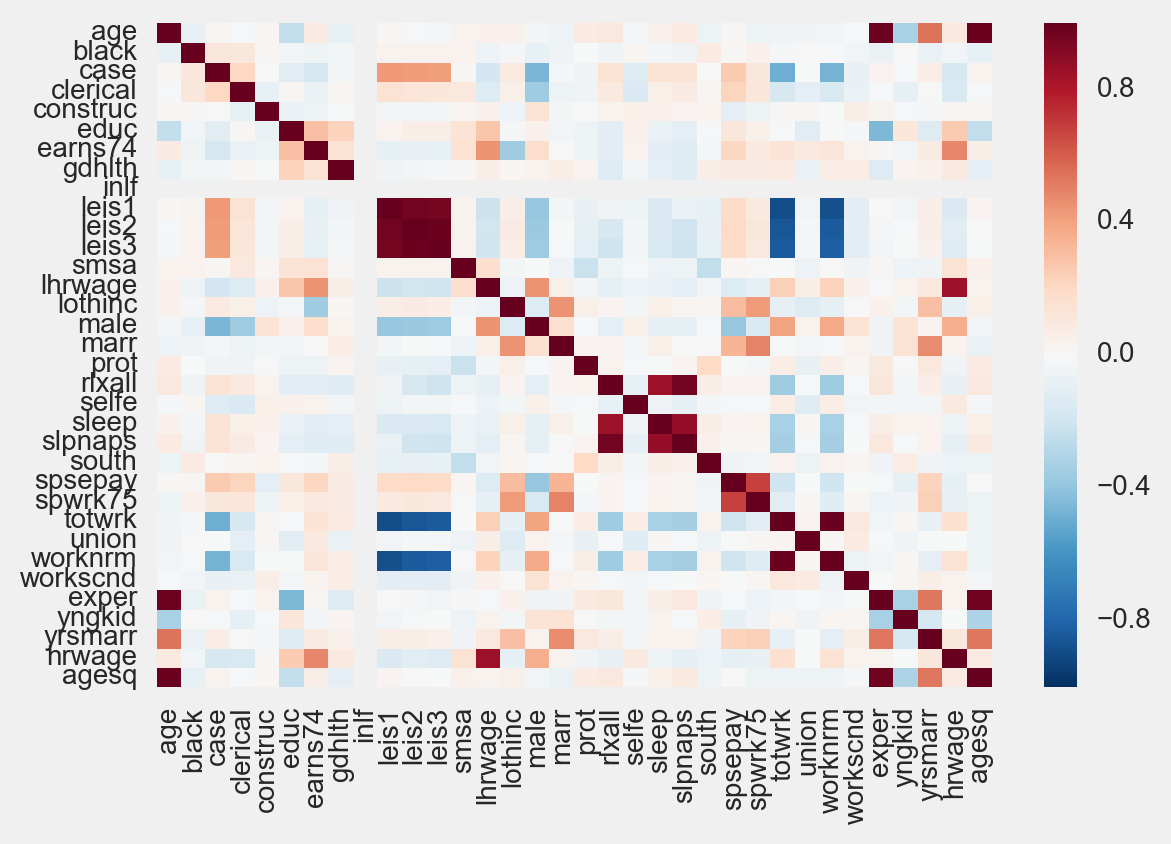

In [10]:
corr = sleep.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

**Citation: Feb 13, 2017 Lecture; 1.3-full-analysis.ipynb

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [11]:
#Define Y and X
Y = sleep.sleep.values 
X = sleep[['totwrk', 'marr','yrsmarr','age','agesq', 'educ', 'male', 'gdhlth', 'yngkid', 'prot','black']]

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Standardize 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)
print (Y.shape), (type(Y))
print ("\n=====\n")
print (Xn.shape), (type(Xn))
    

(532,) <type 'numpy.ndarray'>

=====

(532, 11) <type 'numpy.ndarray'>


In [12]:
#Train test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, Y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape


(372, 11) (160, 11)


(372,) (160,)


**Citation: Feb 27, 2017 Lecture; OLS, CV, Normalization and Regularization 

# 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

**<i>The following section (4.2 Machine Learning models) is heavily based upon Feb 27, 2017 Lecture; <u>OLS_CV_Regularization.ipynb</u> and <u>CART_random_forest_demo.ipynb</u> </i>**

In [13]:
#import packages
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

#Define Linear Model 
lr = LinearRegression()

#Fit Model
lr.fit(X_train, y_train)

#Predict Values
ytrain_pred = lr.predict(X_train)
ytest_pred = lr.predict(X_test)
print(lr.coef_)
print '====\n'

#Cross Validate 
linreg_scores = cross_val_score(lr, X_train, y_train, cv=10)

#Print R^2 
print linreg_scores
print "Average R^2 OLS score: %.3f" %(np.mean(linreg_scores))

[-167.26937057   47.79672426  -24.18410274  -19.870225     58.288351
  -14.39508675   -5.50281759  -29.20779366   18.97644606   16.90405604
  -14.33270688]
====

[ 0.10202634 -0.16281178 -0.05429062  0.28329459 -0.17924442  0.14375554
 -0.09792159  0.0974799   0.08460759 -0.00088748]
Average R^2 OLS score: 0.022


## 4.2.1 OLS
    
---

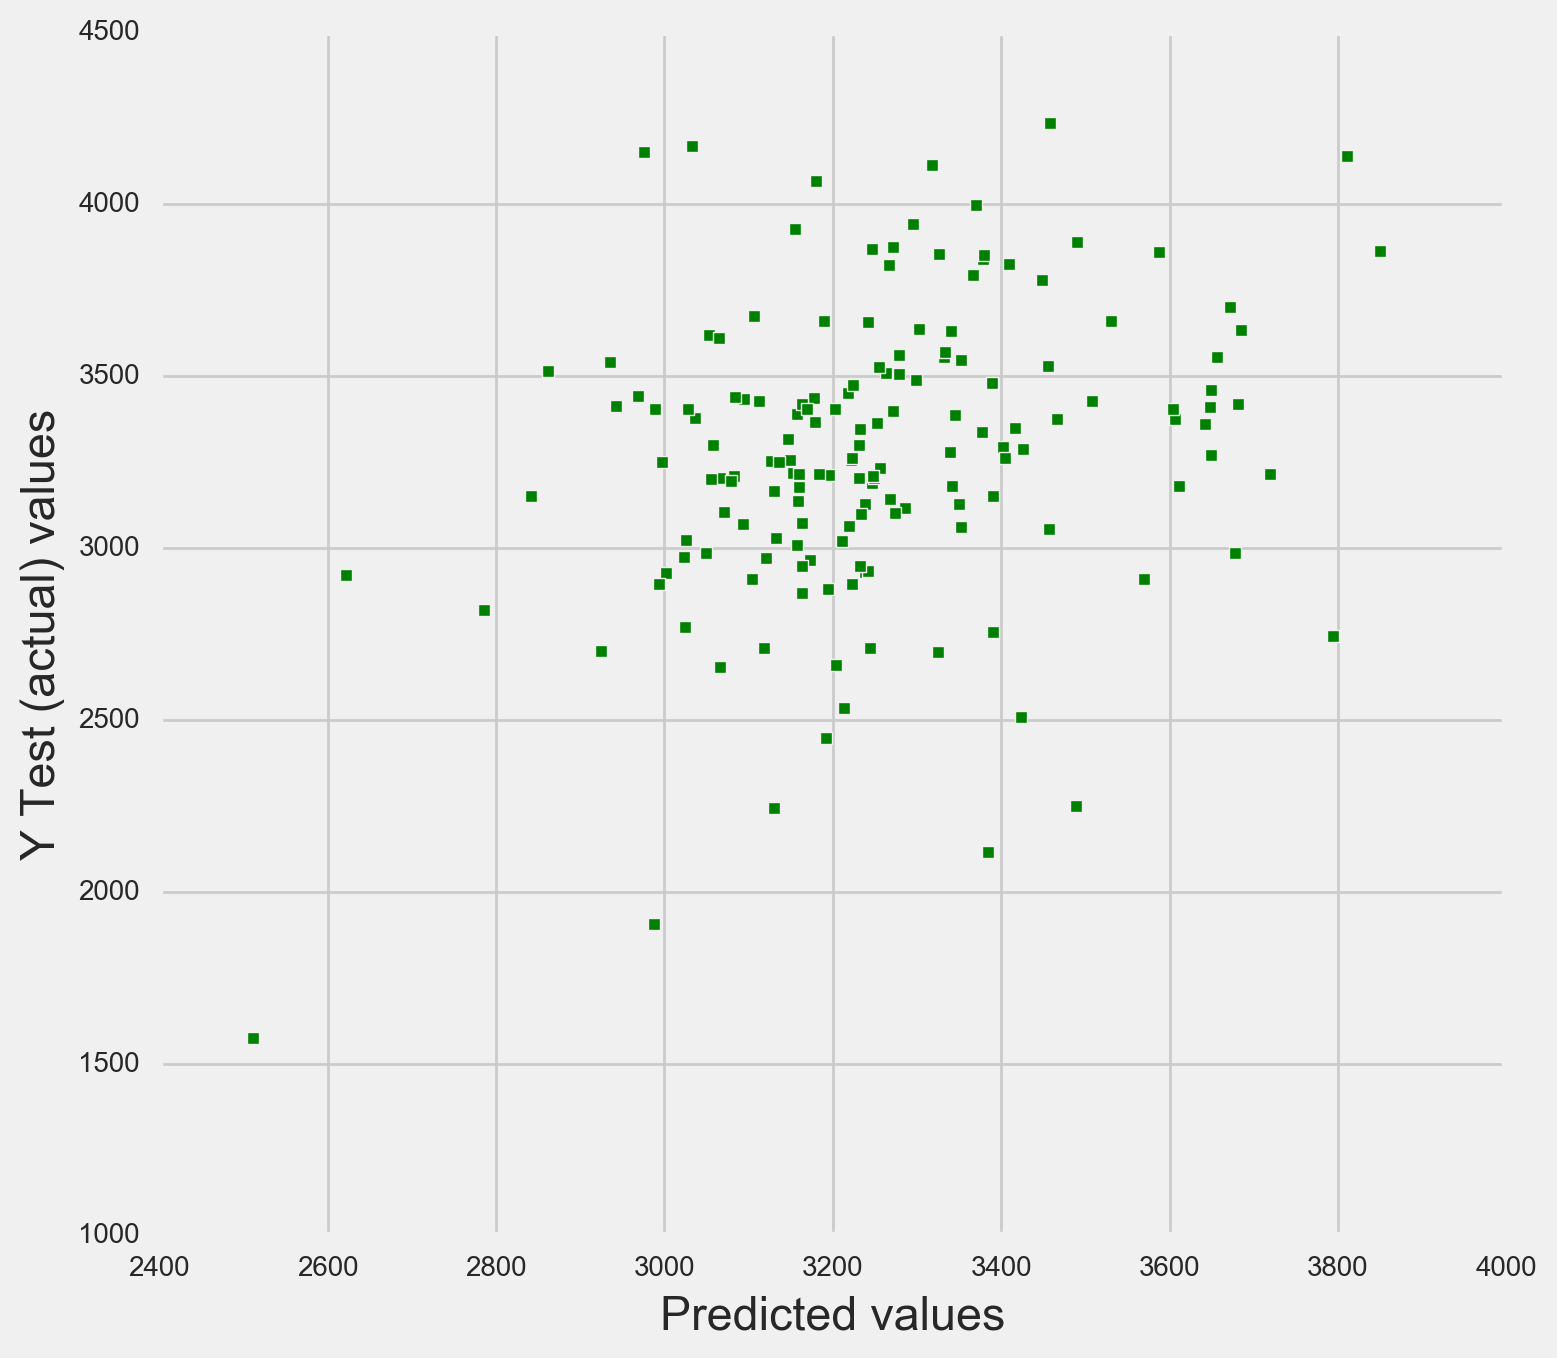

In [14]:
fig = plt.figure(figsize=(8,7))


plt.scatter(ytest_pred, y_test, c='g', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Y Test (actual) values')

plt.tight_layout()

plt.show()

In [15]:
print('MSE - OLS train: %.3f, test: %.3f' % ( mean_squared_error(y_train, ytrain_pred), mean_squared_error(y_test, ytest_pred)))

print('R^2 0LS train: %.3f, test: %.3f' % ( r2_score(y_train, ytrain_pred), r2_score(y_test, ytest_pred)))

MSE - OLS train: 160309.854, test: 172894.230
R^2 0LS train: 0.148, test: 0.033


## 4.2.2 Regularization
    
---

In [16]:
#Import
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)


102.341140211


In [17]:
#Ridge 

ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(X_train, y_train)
ytrain_pred_ridge = ridge.predict(X_train)
ytest_pred_ridge = ridge.predict(X_test)
print(ridge.coef_)
print "====\n"

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

print ridge_scores
print "====\n"
print "Average R^2 Ridge Score: %.3f" % (np.mean(ridge_scores))

print('MSE - Ridge train: %.3f, test: %.3f' % (mean_squared_error(y_train, ytrain_pred_ridge), mean_squared_error(y_test, ytest_pred_ridge)))

print('R^2 - Ridge train: %.3f, test: %.3f' % (r2_score(y_train, ytrain_pred_ridge), r2_score(y_test, ytest_pred_ridge)))

[-122.00241977   28.83758745   -5.42159941   10.12462666   14.38043269
  -11.60548211  -15.89840487  -25.1329514    16.18972617    9.53283322
  -12.43548983]
====

[ 0.11870937 -0.09526247 -0.03059066  0.21384746 -0.1289138   0.12409571
 -0.04372801  0.1223265   0.09051587  0.04987499]
====

Average R^2 Ridge Score: 0.042
MSE - Ridge train: 162127.608, test: 167626.661
R^2 - Ridge train: 0.138, test: 0.062


In [18]:
#Lasso

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print optimal_lasso.alpha_
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)
ytrain_pred_lasso = lasso.predict(X_train)
ytest_pred_lasso = lasso.predict(X_test)
# print(lasso.coef_)
# print "====\n"

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print lasso_scores
print "====\n"

print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

print('MSE - Lasso train: %.3f, test: %.3f' % (mean_squared_error(y_train, ytrain_pred_lasso), mean_squared_error(y_test, ytest_pred_lasso)))

print('R^2 - Lasso train: %.3f, test: %.3f' % (r2_score(y_train, ytrain_pred_lasso), r2_score(y_test, ytest_pred_lasso)))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

25.3530269045
[ 0.1387525  -0.13462552 -0.0203881   0.23336347 -0.16227949  0.08600468
 -0.06311376  0.16172322  0.13344219  0.06910197]
====

Average R^2 Lasso score: 0.044
MSE - Lasso train: 164616.207, test: 166933.010
R^2 - Lasso train: 0.125, test: 0.066


..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

* <b>Ridge</b>: marr, yngkid, agesq, age, prot
* <b>Lasso</b>: marr, agesq

In [19]:
#Function to print the coefficients, their absolute values and the non-absolute values
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_})
    method_coefs.sort_values('coef', inplace=True, ascending=False)
    return method_coefs.head(10)

In [20]:
best_reg_method(X, lasso)

,coef,variable
1,8.004824,marr
4,0.626829,agesq
2,0.000000,yrsmarr
3,0.000000,age
5,-0.000000,educ
6,-0.000000,male
8,0.000000,yngkid
9,0.000000,prot
10,-0.000000,black
7,-5.734461,gdhlth


In [21]:
best_reg_method(X, ridge)

,coef,variable
1,28.837587,marr
8,16.189726,yngkid
4,14.380433,agesq
3,10.124627,age
9,9.532833,prot
2,-5.421599,yrsmarr
5,-11.605482,educ
10,-12.435490,black
6,-15.898405,male
7,-25.132951,gdhlth


## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b><u> Features that best explain Y </u></b>
* <b>Regression Tree</b>: totwrk, educ, marr
* <b>Random Forest</b>: All variables were slightly above zero

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The answers differed slightly from before! 

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

#Gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

#Crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

#Fit Tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [23]:
#Best Score
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 5}


best score -0.0323727303547


In [24]:
#Feature Importance 
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  
feature_importance(X, dtr_best)

,feature,importance
0,totwrk,0.855299
5,educ,0.075349
1,marr,0.069352
2,yrsmarr,0.000000
3,age,0.000000
4,agesq,0.000000
6,male,0.000000
7,gdhlth,0.000000
8,yngkid,0.000000
9,prot,0.000000


In [25]:
#Evaluate Performance 

def rsquare_meansquare_error(y_train, y_test, X_train, X_test, test, best_model):
    ytrain_pred_tree = best_model.predict(X_train)
    ytest_pred_tree = best_model.predict(X_test)
    
    print ('MSE ' + test + ' train data: %.2f, test data %.2f' %(mean_squared_error(y_train, ytrain_pred_tree), mean_squared_error(y_test, ytest_pred_tree)))
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (r2_score(y_train, ytrain_pred_tree),r2_score(y_test, ytest_pred_tree)))
    
rsquare_meansquare_error(y_train, y_test, X_train, X_test, " Regression Tree", dtr_best)

MSE  Regression Tree train data: 151241.27, test data 188617.73
R^2  Regression Tree train data: 0.20, test data: -0.06


## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [26]:
#Grid Search
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

#Cross Validate
estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

#Fit
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   49.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [27]:
#Best Score
rfr_best = estimator_rfr.best_estimator_ 

print "best estimator", rfr_best
print "\n==========\n"
print "best parameters",  estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=4, max_leaf_nodes=6, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 6, 'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 5}


best score 0.062411154345


In [28]:
#Feature Importance
feature_importance(X, rfr_best)

,feature,importance
0,totwrk,0.531081
2,yrsmarr,0.112691
3,age,0.082398
5,educ,0.082249
4,agesq,0.065827
6,male,0.049549
10,black,0.022116
1,marr,0.021497
7,gdhlth,0.014152
8,yngkid,0.013565


In [29]:
#Evaluate Performance 
y_pred_rfdtr = rfr_best.predict(X_test)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, " Random Forest Regression Tree", rfr_best)

MSE  Random Forest Regression Tree train data: 150412.44, test data 168197.30
R^2  Random Forest Regression Tree train data: 0.20, test data: 0.06


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

* Based upon the MSE and R^2, the <b>Random Forest</b> model performed the best because it had the <u>lowest MSE</u> (150633.45) and <u>highest R^2</u> (.20) relative to all other models (Random Tree, Lasso, Ridge, OLS)

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

* Yes

## 7. Explain the Bias Variance trade in the model you selected?
    
---

* Trees are high variance estimators and are unstable; Small changes to the input data may lead to large effects on the structure of the tree

* It may lead to overfitting 

* The tradeoff: Very good predictive accuracy with a potential for high bias